编写Python代码，同时实现预测结果与真实数据的对比图，以及计算累计误差，从而全面地评估预测效果

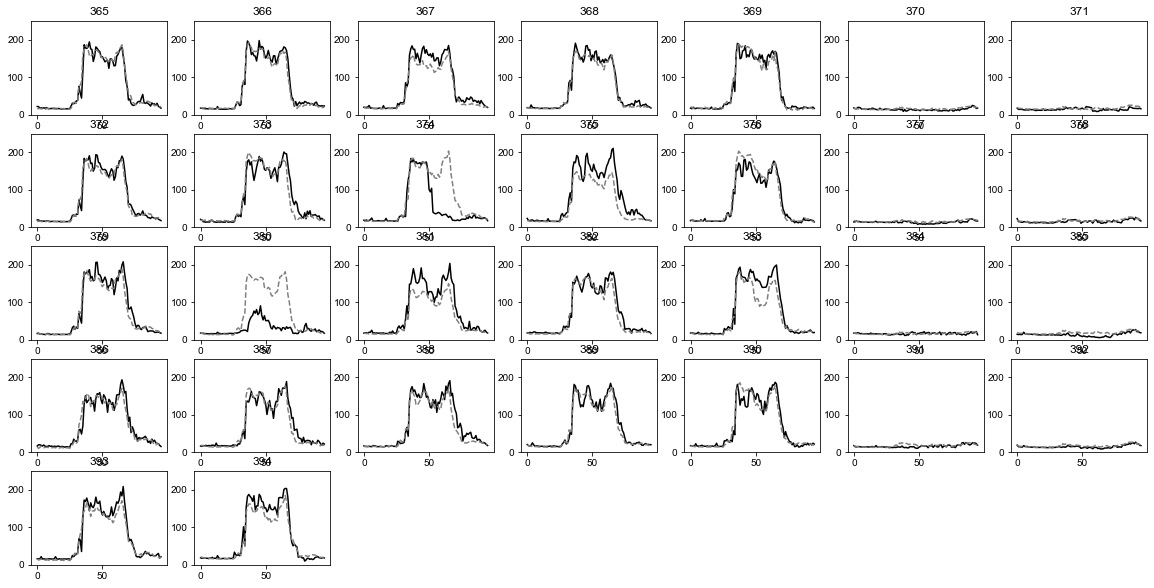

Evaluation on test data: accuracy = 81.55% 



In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 以下 font.family 设置仅适用于 Mac系统，其它系统请使用对应字体名称
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'

p = pd.read_csv("data/p.csv")

with open('data/test_y_real.pkl', 'rb') as f:
    test_y_real = pickle.load(f)
    
with open('data/pred_y.pkl', 'rb') as f:
    pred_y = pickle.load(f)
    
base = 0
error = 0
predates = p.index[-30:p.shape[0]].values
plt.figure(figsize=(20, 10))
for k in range(30):
    pred_array = pred_y[k]
    real_array = test_y_real.iloc[k].values
    plt.subplot(5,7,k+1)
    plt.title(predates[k])
    plt.plot(range(96), real_array, '-', label="real",c='black')
    plt.plot(range(96), pred_array, '--', label="pred",c='gray')
    base = base + np.sum(real_array)
    error = error + np.sum(np.abs(real_array-pred_array))
    plt.ylim(0, 250)
plt.show()
v = 100*(1-error/base)
print("Evaluation on test data: accuracy = %0.2f%% \n" % v)
# Evaluation on test data: accuracy = 79.66% 